In [5]:
import numpy as np
a = 2**np.arange(6,10)
a

array([ 64, 128, 256, 512], dtype=int32)

In [1]:
from AEspeech import AEspeech
from matplotlib import pyplot as plt
import os
from scipy.io.wavfile import read
import scipy
import numpy as np
import torch
from librosa.feature import melspectrogram
import scaleogram as scg 
import pywt
import seaborn as sns
import pandas as pd

In [2]:
# import sys
# PATH = os.getcwd()
# sys.path.append(PATH+"/toolbox/")
# import traintestsplit as tts

# PATH=os.getcwd()
# file_path = PATH+'/../tedx_spanish_corpus/speech/'
# SCALERS = pd.read_csv(file_path+"/../scales.csv")
# MIN_SCALER= SCALERS['Min Scale'] #MIN value of total energy.
# MAX_SCALER= SCALERS['Max Scale']  #MAX value of total energy.

# PATH=os.getcwd()
# file_path = PATH+'/../tedx_spanish_corpus/speech/'
# split = tts.trainTestSplit(path_audio, tst_perc=0.1)
# split.fileTrTstSplit()

# import traintestsplit as tts
# PATH = os.getcwd()
# path_audio = PATH+'/../tedx_spanish_corpus/speech/'
# split = tts.trainTestSplit(path_audio, tst_perc=0.1)
# split.audioTrTstSplit()

In [7]:
PATH=os.getcwd()
path_audio = PATH+'/audios/'
wav_file=path_audio+os.listdir(path_audio)[0]
fs, signal=read(wav_file)

# NFFT=512
# FRAME_SIZE=0.5
# TIME_SHIFT=0.25
# HOP=64

# signal=signal-np.mean(signal)
# signal=signal/np.max(np.abs(signal))
# init=0
# endi=int(FRAME_SIZE*fs)
# nf=int(len(signal)/(TIME_SHIFT*fs))-1
# nmels = 512
# mat=torch.zeros(nf,1, nmels, 126)
# j=0
# frame=signal[init:endi]
# imag=melspectrogram(frame, sr=fs, n_fft=NFFT, hop_length=HOP, n_mels=nmels, fmax=fs/2)


# # window size: 2048-wideband, -broadband, 512-narrowband
# scipy.signal.resample(signal,16000)

# #windo: 512-wideband (default), 128-narrowband
# aespeech=AEspeech("CAE", 1024, fs, nmels=128) # load the pretrained CAE with 1024 units
# min_en = np.inf
# max_en = -np.inf

# for itr, file in enumerate(os.listdir(path_audio)):
#     if os.path.isfile(path_audio+file):
#         mat_spec=aespeech.compute_spectrograms(wav_file) # compute the decoded spectrograms from the autoencoder
#         max_curr = float(torch.max(mat_spec))
#         min_curr = float(torch.min(mat_spec))
#         if max_curr > max_en:
#             max_en = max_curr
#         if min_curr < min_en:
#             min_en = min_curr



In [10]:
# choose default wavelet function 
waveletype = 'morl'
sample_period = 3200
hop = 64
fs_new = 16000

signal_new = scipy.signal.resample(signal,fs_new)
signal_new = signal_new - np.mean(signal_new)
signal_new = signal_new/np.max(np.abs(signal_new))

# range of scales to perform the transform
scales =  np.arange(1, sample_period, hop)*pywt.central_frequency(waveletype)
coefs, freqs = pywt.cwt(signal_new, scales, waveletype)

In [11]:
np.shape(coefs)

(50, 16000)

[Text(0, 0, '0.0'),
 Text(0, 0, '0.99'),
 Text(0, 0, '1.98'),
 Text(0, 0, '2.97'),
 Text(0, 0, '3.96'),
 Text(0, 0, '4.95'),
 Text(0, 0, '5.94'),
 Text(0, 0, '6.93'),
 Text(0, 0, '7.91')]

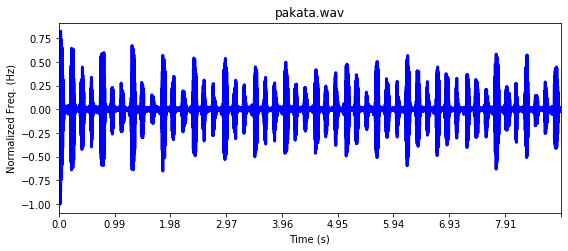

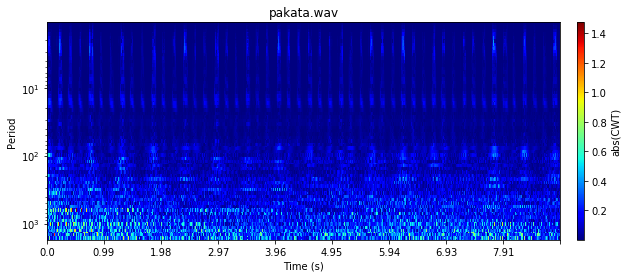

In [9]:
# choose default wavelet function 
waveletype = 'morl'

fs_new = 16000
signal_new = scipy.signal.resample(signal,fs_new)
signal_new = signal_new - np.mean(signal_new)
signal_new = signal_new/np.max(np.abs(signal_new))
signal_new_length = np.shape(signal_new)[0]
uns_signal_length = np.shape(signal)[0]
xtix = np.array((np.arange(uns_signal_length)/fs))


# range of scales to perform the transform
scales = np.logspace(np.log10(2), np.log10(3200), 64)*pywt.central_frequency(waveletype)


x_values_wvt_arr = range(0,signal_new_length,1)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
ax1.plot(x_values_wvt_arr, signal_new[:signal_new_length], linewidth=3, color='blue')
ax1.set_xlim(0, signal_new_length)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Normalized Freq. (Hz)")
ax1.set_title(wav_file.split('/')[-1])
ax1.set_xticks(np.arange(0,fs_new,signal_new_length//np.ceil(xtix[-1])))
ax1.set_xticklabels(np.round(xtix[0:-1:int(uns_signal_length//int(np.ceil(xtix[-1])))],2))

# the scaleogram
ax2 = scg.cws(signal_new[:signal_new_length], scales=scales, figsize=(10, 4.0), yscale = 'log',coi = False, ylabel="Period", xlabel="Time (s)",
        title=wav_file.split('/')[-1])
ax2.set_xticks(np.arange(0,fs_new,signal_new_length//np.ceil(xtix[-1])))
ax2.set_xticklabels(np.round(xtix[::int(uns_signal_length//int(np.ceil(xtix[-1])))],2))


In [ ]:
# from playsound import playsound
# import wave

# fs_new = 16000
# signal = scipy.signal.resample(signal,fs_new,window=512)
# out_f = wav_path+'../c.wav'
# obj = wave.open(out_f,'w')
# obj.setnchannels(1) # mono
# obj.setsampwidth(2)
# obj.setframerate(fs_new)
# obj.writeframes(signal.astype(np.int16))
# obj.close()
# playsound(out_f)

# fs_new = 16000
# signal = scipy.signal.resample(signal,fs_new,window=512)
# signal_length = np.shape(signal)[0]
# obj.writeframes(sig.astype(np.int16))
# obj.close()
# playsound(out_f)
# playsound(signal,fs_new)

In [ ]:
# signal_unsampled = signal
# fs_new = 16000
# signal = scipy.signal.resample(signal,fs_new,window=512)
# signal_length = np.shape(signal)[0]
# uns_signal_length = np.shape(signal_unsampled)[0]

# xtix = np.array((np.arange(uns_signal_length)/fs))
# xtix[0:-1:int(uns_signal_length//int(np.floor(xtix[-1])))]

# fs_new = 16000
# signal = scipy.signal.resample(signal,fs_new,window=512)
# len(signal)

In [ ]:
# signal_unsampled = signal
# fs_new = 5000
# signal_new = scipy.signal.resample(signal_new,fs_new,window=512)
# signal_new_length = np.shape(signal_new)[0]
# uns_signal_length = np.shape(signal_new)[0]
# xtix = np.array((np.arange(uns_signal_length)/fs))

# cmap = plt.cm.seismic, 
# title = 'Wavelet Transform (Power Spectrum) of signal', 
# ylabel = 'Period (years)', 
# xlabel = 'Time'

# TIME_SHIFT=0.25
# time = np.arange(0, signal_new_length)*TIME_SHIFT
# scales = np.arange(1,128)

# [coefficients, frequencies] = pywt.cwt(signal_new,scales,'morl')
# power = (abs(coefficients)) ** 2
# period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
# contourlevels = np.log2(levels)

# fig, ax = plt.subplots(figsize=(15, 10))
# im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both')
# ax.set_xlabel("Time")
# ax.set_ylabel("Frequency")
# # ax.set_xticklabels(xtix[0:-1:int(uns_signal_length//int(np.floor(xtix[-1])))])
                